In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pingouin as pg
import statsmodels
%matplotlib inline

# Рост певцов хора

В 1979 году было опрошено 235 членов нью-йоркской ассоциации хорового пения, для каждого из них известен рост и регистр голоса. Меняется ли средний рост вместе с регистром?

In [43]:
singer = pd.read_csv('singer.csv', sep=',')

In [44]:
singer.height = singer.height* 2.54
singer['voice.part'] = singer['voice.part'].astype('category')

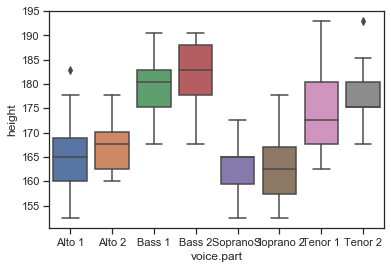

In [45]:
sns.boxplot(x='voice.part', y='height',data=singer)

Воспользуйстесь непараметричеcким критерием Краскела-Уоллиса для признака height и фактора voice.part.

In [46]:
pg.kruskal(singer, dv='height', between='voice.part')

,Source,ddof1,H,p-unc
Kruskal,voice.part,7,141.836,2.095721e-27


Для проверки однородности выборок из нормального распределения можно поступать следующим образом. Сначала проверить гипотезу о равенстве дисперсий (Бартлета) и в случае, если эта гипотеза принимается, воспользоваться нормальным однофакторным дисперсионным анализом для проверки гипотезы о равнестве всех средних.  

Проверьте гипотезу о равенстве дисперсий выборок, определяющихся значением фактора voice.part c помощью критерия Бартлета.

Проведите нормальный однофакторный дисперсионный анализ. 

Критерий Бартлетта:

In [47]:
pg.homoscedasticity(singer,method='bartlett', dv='height', group='voice.part', alpha=.05) 

,T,pval,equal_var
bartlett,11.736,0.109566,True


Нормальный однофакторный дисперсионный анализ:

In [48]:
pg.anova(dv='height', between='voice.part', data=singer,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,voice.part,12911.304,7,1844.472,45.642,5.61705e-40,0.585
1,Within,9173.484,227,40.412,-,-,-


# Влияние витамина C на рост зубов морских свинок

В эксперименте изучалось влияние витамина C на рост одонтобластов морских свинок.  

Рассматривалось три дозы витамина (0.5, 1 и 2 мг) и два способа его приёма (апельсиновый сок и аскорбиновая кислота). В каждой из 6 групп по уровням двух факторов были произведены измерения для 10 морских свинок.

In [49]:
ToothGrowth = pd.read_csv('ToothGrowth.csv', sep=',')
ToothGrowth['dose'] = ToothGrowth['dose'].astype('category')
ToothGrowth['supp'] = ToothGrowth['supp'].astype('category')

In [50]:
ToothGrowth.head()

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5
3,5.8,VC,0.5
4,6.4,VC,0.5


In [51]:
ToothGrowth.describe()

,len
count,60.000000
mean,18.813333
std,7.649315
min,4.200000
25%,13.075000
50%,19.250000
75%,25.275000
max,33.900000


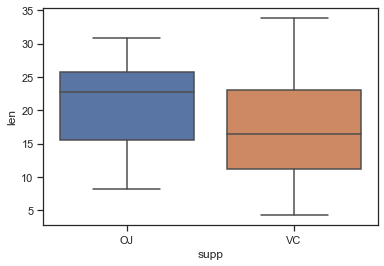

In [52]:
sns.boxplot(x='supp', y='len',data=ToothGrowth)

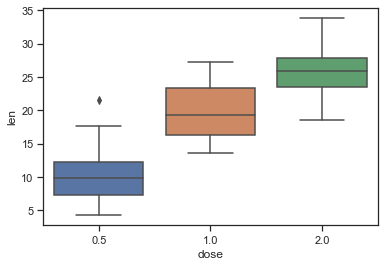

In [53]:
sns.boxplot(x='dose', y='len',data=ToothGrowth)

Применим нормальный двухфакторный дисперсионный анализ без учета и с учтом межфакторного взаимодействия.Для ANOVA c учетом взаимодействия выводится supp*dose.

In [54]:
pg.anova(dv='len', between=['dose', 'supp'], data=ToothGrowth,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,dose,2426.434,2,1213.217,91.999952,4.046303e-18,0.773109
1,supp,205.350,1,205.350,15.571979,2.311828e-04,0.223825
2,dose * supp,108.319,2,54.160,4.107004,2.186003e-02,0.132028
3,Residual,712.106,54,13.187,NaN,NaN,NaN


Межфакторное взаимодействие можно неплохо визуализировать для более-менее простых случаев c помощью команды interaction_plot. Получите графики зависимостей, если по оси x откладывать supp и если по оси x откладывать dose. Проинтерпретируйте полученные зависимости.

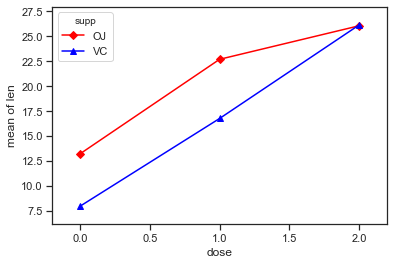

In [55]:
statsmodels.graphics.factorplots.interaction_plot(ToothGrowth['dose'], 
                                                  ToothGrowth['supp'], 
                                                  ToothGrowth['len'],
                                                  colors=['red','blue'], 
                                                  markers=['D','^'])
plt.show()

In [56]:
ToothGrowth['supp_codes'] = ToothGrowth['supp'].cat.codes

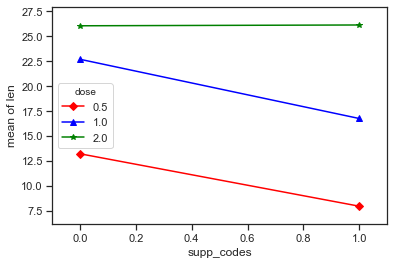

In [57]:
statsmodels.graphics.factorplots.interaction_plot(ToothGrowth['supp_codes'], 
                                                  ToothGrowth['dose'], 
                                                  ToothGrowth['len'],
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])
plt.show()

Взаимодействие значимо, поэтому разделим выборку по способу приёма витамина (колонка supp).

In [58]:
OJ = ToothGrowth[ToothGrowth.supp == 'OJ']
VC = ToothGrowth[ToothGrowth.supp == 'VC']

Проведите дисперсионный анализ внутри каждой из групп:  

- Для морских свинок, принимающих аскорбиновую кислоту  

- Для морских свинок, принимающих апельсиновый сок

Вам нужно  

- Построить гарфик зависимостей len ~ dose

- Построить aov модель len ~ dose. Посмотреть на вывод summary

- Проведите тест kruskal

- Сделать выводы по для каждой из груп свинок

Для морских свинок, принимающих аскорбиновую кислоту:

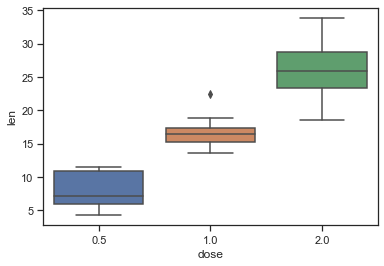

In [59]:
sns.boxplot(x='dose', y='len',data=VC)

In [60]:
pg.anova(dv='len', between=['dose'], data=VC,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,dose,1649.489,2,824.744,67.072,3.35732e-11,0.832
1,Within,332.001,27,12.296,-,-,-


In [61]:
pg.kruskal(VC, dv='len', between='dose')

,Source,ddof1,H,p-unc
Kruskal,dose,2,25.072,0.000004


Для морских свинок, принимающих апельсиновый сок:

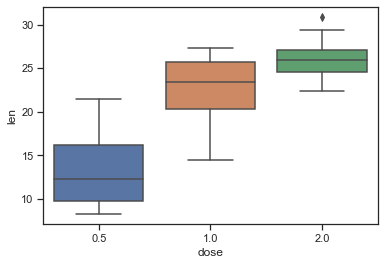

In [62]:
sns.boxplot(x='dose', y='len',data=OJ)

In [63]:
pg.anova(dv='len', between=['dose'], data=OJ,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,dose,885.265,2,442.632,31.442,8.88716e-08,0.7
1,Within,380.105,27,14.078,-,-,-


In [64]:
pg.kruskal(OJ, dv='len', between='dose')

,Source,ddof1,H,p-unc
Kruskal,dose,2,18.506,0.000096


# Лечение гипертонии

72 пациента проходили лечение от гипертонии. Для лечения использовались три вида лекарств, при этом их эффект изучался как при использовании специальной диеты, так и в её отсутствии; кроме того, в половине случаев применялась психотерапия. Данные — артериальное давление пациента по окончании лечения.  

Требуется сравнить эффективность методов лечения гипертонии.  

In [65]:
data = pd.read_table('hyper.txt', delimiter="\t")

In [66]:
data.head()

,biofeedback,diet,drug,pressure
0,present,absent,1,170
1,present,absent,1,175
2,present,absent,1,165
3,present,absent,1,180
4,present,absent,1,160


In [67]:
data['drug'] = data['drug'].astype('category')

Проведите трехфакторный дисперсионный анализ, используя все взаимодействия ( biofeedback * diet * drug). Что можно сказать о значимости тройного взаимодействия? Можно ли интерпретировать значимость воздействия одиночных факторов в таком случае?

In [68]:
pg.anova(dv='pressure', between=['biofeedback', 'diet', 'drug'], data=data,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,biofeedback,2048.0,1.0,2048.000,13.072,6.150719e-04,0.179
1,diet,5202.0,1.0,5202.000,33.204,3.053308e-07,0.356
2,drug,3675.0,2.0,1837.500,11.729,5.018624e-05,0.281
3,biofeedback * diet,32.0,1.0,32.000,0.204,6.529374e-01,0.003
4,biofeedback * drug,259.0,2.0,129.500,0.827,4.424565e-01,0.027
5,diet * drug,903.0,2.0,451.500,2.882,6.381527e-02,0.088
6,biofeedback * diet * drug,1075.0,2.0,537.500,3.431,3.883423e-02,0.103
7,Residual,9400.0,60.0,156.667,NaN,NaN,NaN


Нарисуйте графики взаимодействия  

- между психотерапией и использованием лекарств для каждого фиксированного значения диеты.  

- между диетой и использованием лекарства при фиксированном значении психотерапии.  

Можете ли вы проинтерпретировать данные графики?  

In [69]:
absent_diet = data[data.diet == 'absent'].reset_index()
present_diet = data[data.diet == 'present'].reset_index()

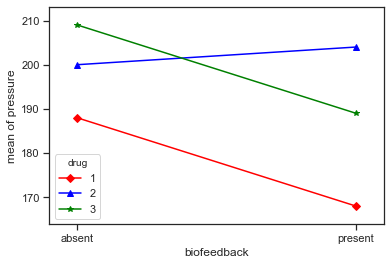

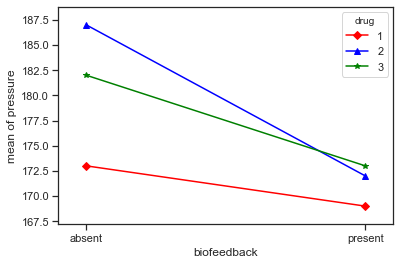

In [70]:
# diet is Absent
statsmodels.graphics.factorplots.interaction_plot(absent_diet.biofeedback, 
                                                  absent_diet.drug, 
                                                  absent_diet.pressure,
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])
# diet is Present
statsmodels.graphics.factorplots.interaction_plot(present_diet.biofeedback, 
                                                  present_diet.drug, 
                                                  present_diet.pressure,
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])
plt.show()

In [71]:
absent_biofeedback = data[data.biofeedback == 'absent'].reset_index()
present_biofeedback = data[data.biofeedback == 'present'].reset_index()

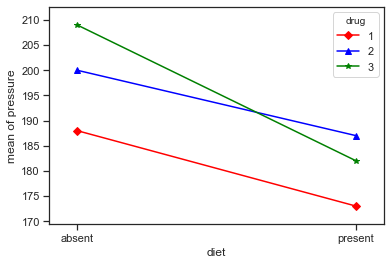

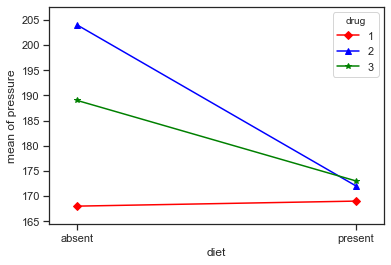

In [72]:
# biofeedback is Absent
statsmodels.graphics.factorplots.interaction_plot(absent_biofeedback.diet, 
                                                  absent_biofeedback.drug, 
                                                  absent_biofeedback.pressure,
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])
# biofeedback is Present
statsmodels.graphics.factorplots.interaction_plot(present_biofeedback.diet, 
                                                  present_biofeedback.drug,
                                                  present_biofeedback.pressure,
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])
plt.show()

Тройное взаимодействие значимо, поэтому разделим выборку по одному из признаков.  

Двухфакторный дисперсионный анализ для пациентов, проходящих психотерапию:

In [73]:
pg.anova(dv='pressure', between=['diet', 'drug'], data=present_biofeedback,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,diet,2209.0,1,2209.000,15.248504,0.000496,0.336995
1,drug,2342.0,2,1171.000,8.083295,0.001556,0.350179
2,diet * drug,1634.0,2,817.000,5.639669,0.008334,0.273244
3,Residual,4346.0,30,144.867,NaN,NaN,NaN


Есть значимое межфакторное взаимодействие:

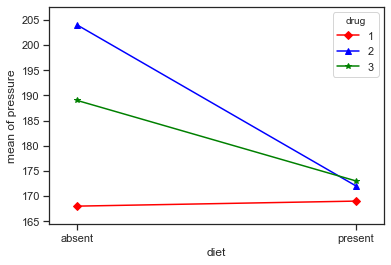

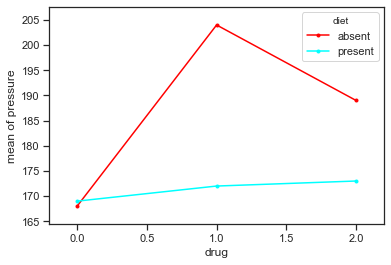

In [74]:
statsmodels.graphics.factorplots.interaction_plot(present_biofeedback.diet, 
                                                  present_biofeedback.drug,
                                                  present_biofeedback.pressure,
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])

statsmodels.graphics.factorplots.interaction_plot(present_biofeedback.drug, 
                                                  present_biofeedback.diet,
                                                  present_biofeedback.pressure)
plt.show()

Поэтому снова поделим выборку.  

Однофакторный анализ для пациентов, проходящих психотерапию и сидящих на диете:  

In [75]:
present_bio_present_diet = present_biofeedback[present_biofeedback.diet == 'present'].reset_index()

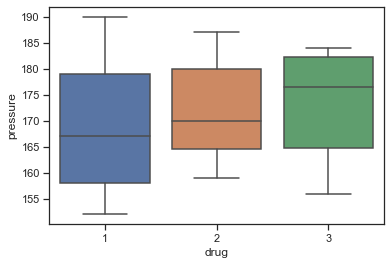

In [76]:
sns.boxplot(x='drug', y='pressure',data=present_bio_present_diet)

In [77]:
pg.anova(dv='pressure', between=['drug'], data=present_bio_present_diet,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,drug,52.0,2,26.0,0.164,0.850126,0.021
1,Within,2376.0,15,158.4,-,-,-


Значимых различий между эффектами препаратов нет.  

Однофакторный анализ для пациентов, проходящих психотерапию и не сидящих на диете:  

In [78]:
present_bio_absent_diet = present_biofeedback[present_biofeedback.diet == 'absent'].reset_index()

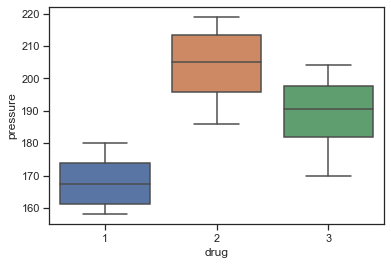

In [79]:
sns.boxplot(x='drug', y='pressure',data=present_bio_absent_diet)

In [80]:
pg.anova(dv='pressure', between=['drug'], data=present_bio_absent_diet,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,drug,3924.0,2,1962.000,14.939,0.000269414,0.666
1,Within,1970.0,15,131.333,-,-,-


Препарат 1 значимо эффективнее двух других, давление после его приёма оказывается в среднем примерно на 20 мм. рт. ст. ниже.  

Двухфакторный дисперсионный анализ для пациентов, не проходящих психотерапию: 

In [81]:
pg.anova(dv='pressure', between=['diet','drug'], data=absent_biofeedback,detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,diet,3025.0,1,3025.000,17.956074,0.000198,0.374428
1,drug,1592.0,2,796.000,4.724970,0.016448,0.239543
2,diet * drug,344.0,2,172.000,1.020973,0.372422,0.063727
3,Residual,5054.0,30,168.467,NaN,NaN,NaN


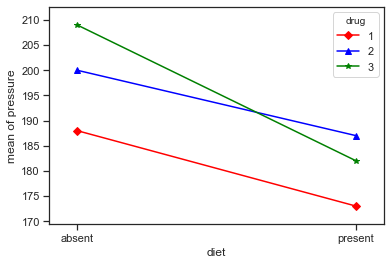

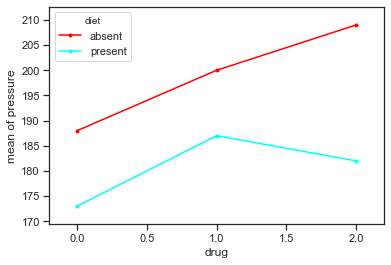

In [82]:
statsmodels.graphics.factorplots.interaction_plot(absent_biofeedback.diet, 
                                                  absent_biofeedback.drug,
                                                  absent_biofeedback.pressure,
                                                  colors=['red','blue', 'green'], 
                                                  markers=['D','^', '*'])

statsmodels.graphics.factorplots.interaction_plot(absent_biofeedback.drug, 
                                                  absent_biofeedback.diet,
                                                  absent_biofeedback.pressure)
plt.show()

Итого:

- если пациент не проходит психотерапию, соблюдение диеты приводит к значимому уменьшению давления в среднем на 18 мм. рт. ст. при приёме любого из трёх препаратов;
- если пациент не проходит психотерапию, препарат 1 снижает давление эффективнее препарата 3 (в среднем на 2 мм. рт. ст. меньше) независимо от соблюдения диеты;
- эффективность всех трёх препаратов неразличима для пациентов, сидящих на диете и проходящих психотерапию;
- для пациентов, проходящих психотерапию и не сидящих на диете, препарат 1 эффективнее в среднем примерно на 20 мм. рт. ст.

Чтобы сделать другие возможные выводы (например, оценить эффекты психотерапии и эффект диеты для тех, кто проходит психотерапию), нужно разбить трёхфакторный анализ по двум другим признакам.